In [81]:
import csv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [82]:
df_mat_lv = pd.read_csv('MaternityLeave.csv')
print("The shape of the data: " + str(df_mat_lv.shape))
df_mat_lv.head()

The shape of the data: (972, 6)


,Name,Industry,Maternity Leave\nPaid (weeks),Maternity Leave\nUnpaid (weeks),Paternity Leave\nPaid (weeks),Paternity Leave\nUnpaid (weeks)
0,ClassPass,Wellness & Fitness,14.0,12.0,4.0,NaN
1,Equinox,Wellness & Fitness,6.0,12.0,NaN,NaN
2,Enterprise Holdings,Transportation: Rental,17.0,17.0,NaN,NaN
3,"Hertz Global Holdings, Inc.",Transportation: Rental,12.0,0.0,NaN,NaN
4,"Avis Budget Group, Inc.",Transportation: Rental,6.0,6.0,NaN,NaN


This dataframe contains information about the amount of maternity (and paternity) leave offered by 972 companies

In [83]:
df_mat_lv = df_mat_lv.drop(['Paternity Leave\nPaid (weeks)', 'Paternity Leave\nUnpaid (weeks)'], axis=1)
df_mat_lv.head()

,Name,Industry,Maternity Leave\nPaid (weeks),Maternity Leave\nUnpaid (weeks)
0,ClassPass,Wellness & Fitness,14.0,12.0
1,Equinox,Wellness & Fitness,6.0,12.0
2,Enterprise Holdings,Transportation: Rental,17.0,17.0
3,"Hertz Global Holdings, Inc.",Transportation: Rental,12.0,0.0
4,"Avis Budget Group, Inc.",Transportation: Rental,6.0,6.0


In [84]:
df_mat_lv.columns = ["Company Name", "Industry", "Maternity Leave (paid)", "Maternity Leave (unpaid)"]
df_mat_lv.head()

,Company Name,Industry,Maternity Leave (paid),Maternity Leave (unpaid)
0,ClassPass,Wellness & Fitness,14.0,12.0
1,Equinox,Wellness & Fitness,6.0,12.0
2,Enterprise Holdings,Transportation: Rental,17.0,17.0
3,"Hertz Global Holdings, Inc.",Transportation: Rental,12.0,0.0
4,"Avis Budget Group, Inc.",Transportation: Rental,6.0,6.0


In [85]:
df_mat_lv["Maternity Leave (unpaid)"] = df_mat_lv["Maternity Leave (unpaid)"].fillna(0.0)
df_mat_lv = df_mat_lv.dropna()
print("the shape of the dataframe is now: " + str(df_mat_lv.shape))

the shape of the dataframe is now: (965, 4)


In [86]:
df_mat_lv['Industry'].unique()

array(['Wellness & Fitness', 'Transportation: Rental', 'Wholesale',
       'Transportation: Rail', 'Transportation: Passenger Air',
       'Transportation: Freight & Logistics',
       'Transportation: Couriers & Delivery', 'Transportation: Bus',
       'Telecommunications', 'Technology: Software',
       'Technology: Security', 'Technology: Research',
       'Technology: Payments', 'Technology: Manufacturing',
       'Technology: Gaming', 'Technology: Financial Services',
       'Technology: Consumer Internet', 'Technology: B2B Tech Services',
       'Sports', 'Services: Waste Management', 'Services: Translation',
       'Services: Other', 'Services: Daycare', 'Services: Cleaning',
       'Retail: Supermarket Company',
       'Retail: Stationary & Office Supplies',
       'Retail: Shoes, Accessories and Apparel', 'Retail: Other',
       'Retail: Online', 'Retail: Jewelery',
       'Retail: General Merchandise',
       'Retail: Furniture & Home Improvement', 'Retail: Electronics',
    

In [87]:
df_industries_sum = pd.read_csv('cpsaat18sum.csv')
df_industries_sum.columns = ["Industry", "Total Unemployed", "Women", "White", "Black or African American", "Asian", "Hispanic or Latino"]

df_industries_sum

,Industry,Total Unemployed,Women,White,Black or African American,Asian,Hispanic or Latino
0,"Total, 16 years and over","157,538",47.0,77.7,12.3,6.5,17.6
1,"Agriculture, forestry, fishing, and hunting","2,425",26.2,93.0,2.2,1.7,27.5
2,"Mining, quarrying, and oil and gas extraction",750,15.8,86.7,5.1,3.7,20.1
3,Construction,"11,373",10.3,88.1,6.4,1.9,30.4
4,Manufacturing,"15,741",29.4,79.5,10.4,6.8,16.8
5,Wholesale and retail trade,"19,742",44.2,78.6,11.7,5.7,18.1
6,Transportation and utilities,"8,991",24.1,71.0,20.1,5.6,18.8
7,Information,"2,766",40.5,76.9,11.3,8.5,12.5
8,Financial activities,"10,765",52.6,79.6,10.5,7.5,12.9
9,Professional and business services,"19,606",41.3,77.4,10.0,9.6,16.0


In [88]:
df_occ_gender = pd.read_csv('inc_occ_gender.csv')
df_occ_gender.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
4,Legislators,8,Na,5,Na,4,Na


In [89]:
df_occ_gender = df_occ_gender[df_occ_gender.All_weekly != 'Na']
df_occ_gender = df_occ_gender[df_occ_gender.M_weekly != 'Na']
df_occ_gender = df_occ_gender[df_occ_gender.F_weekly != 'Na']
df_occ_gender = df_occ_gender[df_occ_gender.M_workers != 'Na']
df_occ_gender = df_occ_gender[df_occ_gender.All_workers != 'Na']
df_occ_gender = df_occ_gender[df_occ_gender.F_workers != 'Na']

In [90]:
df_occ_gender

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
6,Marketing and sales managers,948,1462,570,1603,378,1258
...,...,...,...,...,...,...,...
521,TRANSPORTATION,6953,646,5998,679,955,494
527,Bus drivers,323,615,184,681,138,572
528,Driver/sales workers and truck drivers,2687,747,2582,751,105,632
550,"Laborers and freight, stock, and material move...",1433,526,1214,547,219,455


In [91]:
x1 = df_occ_gender.loc[df_occ_gender['Occupation'] == "MANAGEMENT"]
x2 = df_occ_gender.loc[df_occ_gender['Occupation'] == "BUSINESS"]
x3 = df_occ_gender.loc[df_occ_gender['Occupation'] == "COMPUTATIONAL"]
x4 = df_occ_gender.loc[df_occ_gender['Occupation'] == "ENGINEERING"]
x5 = df_occ_gender.loc[df_occ_gender['Occupation'] == "SCIENCE"]
x6 = df_occ_gender.loc[df_occ_gender['Occupation'] == "SOCIAL SERVICE"]
x7 = df_occ_gender.loc[df_occ_gender['Occupation'] == "LEGAL"]
x8 = df_occ_gender.loc[df_occ_gender['Occupation'] == "EDUCATION"]
x9 = df_occ_gender.loc[df_occ_gender['Occupation'] == "ARTS"]
x10 = df_occ_gender.loc[df_occ_gender['Occupation'] == "HEALTHCARE PROFESSIONAL"]
x11 = df_occ_gender.loc[df_occ_gender['Occupation'] == "CULLINARY"]
x12 = df_occ_gender.loc[df_occ_gender['Occupation'] == "SERVICE"]
x13 = df_occ_gender.loc[df_occ_gender['Occupation'] == "SALES"]
x14 = df_occ_gender.loc[df_occ_gender['Occupation'] == "OFFICE"]
x15 = df_occ_gender.loc[df_occ_gender['Occupation'] == "AGRICULTIRAL"]
x16 = df_occ_gender.loc[df_occ_gender['Occupation'] == "CONSTRUCTION"]
x17 = df_occ_gender.loc[df_occ_gender['Occupation'] == "MAINTAINANCE"]
x18 = df_occ_gender.loc[df_occ_gender['Occupation'] == "PRODUCTION"]
x19 = df_occ_gender.loc[df_occ_gender['Occupation'] == "TRANSPORTATION"]

job_categories = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19]

df_job_cat = pd.concat(job_categories)
df_job_cat

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
32,BUSINESS,5942,1137,2686,1327,3256,1004
61,COMPUTATIONAL,4009,1428,3036,1503,973,1245
78,ENGINEERING,2656,1424,2272,1452,383,1257
100,SCIENCE,1176,1206,662,1379,514,1067
124,SOCIAL SERVICE,2143,889,776,973,1367,845
133,LEGAL,1346,1391,624,1877,722,1135
139,EDUCATION,6884,956,1849,1144,5034,907
151,ARTS,1643,1001,930,1088,713,942
171,HEALTHCARE PROFESSIONAL,6566,1041,1639,1272,4928,991


In [92]:
def industry_group(industry):
    if 'Technology' in industry:
        out = 'Information'
    elif 'Agriculture' in industry or 'Maritime' in industry:
        out = 'Agriculture, forestry, fishing, and hunting'
    elif 'Information' in industry or 'Telecommunications' in industry:
        out = 'Information'
    elif 'Natural Resources' in industry:
        out = 'Mining, quarrying, and oil and gas extraction'
    elif 'Finance' in industry:
        out = 'Financial activities'
    elif 'Manufacturing' in industry or 'Manufacturers' in industry or 'Textiles' in industry or 'Furniture' in industry:
        out = 'Manufacturing'
    elif 'Aerospace' in industry or 'Packaging' in industry:
        out = 'Manufacturing'
    elif 'Transportation' in industry:
        out = 'Transportation and utilities'
    elif 'Healthcare' in industry or 'Educational' in industry:
        out = 'Education and health services'
    elif 'Pharmaceutical' in industry or 'Pharmacies' in industry:
        out = 'Education and health services'
    elif 'Retail' in industry:
        out = 'Wholesale and retail trade'
    elif 'Wholesale' in industry or 'Cosmetics' in industry or 'Sporting Goods' in industry or "Dealer" in industry:
        out = 'Wholesale and retail trade'
    elif 'Hospitality' in industry or 'Leisure' in industry or 'Fitness' in industry:
        out = 'Leisure and hospitality'
    elif 'Media' in industry or 'Photography' in industry or 'Art' in industry:
        out = 'Leisure and hospitality'
    elif 'Printing' in industry:
        out = "Manufacturing"
    elif 'Publishing' in industry:
        out = 'Leisure and hospitality'
    elif 'Design' in industry or 'Sport' in industry:
        out = 'Leisure and hospitality'
    elif 'Advertising' in industry or 'Consulting' in industry or 'Accounting' in industry or 'Architecture' in industry:
        out = 'Professional and business services'
    elif 'Information Services' in industry or 'Firm' in industry:
        out = 'Professional and business services'
    elif 'Business' in industry or 'Public Relations' in industry or "Conglomerate" in industry:
        out = 'Professional and business services'
    elif 'Insurance' in industry or 'Real Estate' in industry:
        out = 'Financial activities'
    elif 'Government' in industry or 'Defense & Space' in industry:
        out = 'Public administration'
    elif 'Industrial' in industry:
        out = 'Construction'
    elif 'Consumer Packaged' in industry:
        out = 'Manufacturing'
    elif 'Nonprofit' in industry or 'Philanthropy' in industry or 'Services:' in industry:
        out = 'Other services'
    elif 'Automotive' in industry:
        out = 'Manufacturing'
    elif 'Wholesaler' in industry:
        out = 'Wholesale and retail trade'
    else:
        out = industry
    return out

In [93]:
df_mat_lv['Industry Groups'] = df_mat_lv['Industry'].apply(industry_group)
df_mat_lv.head()

,Company Name,Industry,Maternity Leave (paid),Maternity Leave (unpaid),Industry Groups
0,ClassPass,Wellness & Fitness,14.0,12.0,Leisure and hospitality
1,Equinox,Wellness & Fitness,6.0,12.0,Leisure and hospitality
2,Enterprise Holdings,Transportation: Rental,17.0,17.0,Transportation and utilities
3,"Hertz Global Holdings, Inc.",Transportation: Rental,12.0,0.0,Transportation and utilities
4,"Avis Budget Group, Inc.",Transportation: Rental,6.0,6.0,Transportation and utilities


Now that the companies have been sorted into a smaller range of industry classifications, it is time to calculate the average number of weeks of paid maternity leave that is provided in these industries

In [94]:
avg_mat_lv_ind = {}
std_ind = {}
range_ind = {}
grps = df_mat_lv.groupby(df_mat_lv['Industry Groups'])
for group in grps:
    ind = group[0]
    grp = group[1]
    std = statistics.stdev(grp['Maternity Leave (paid)'])
    avg = grp['Maternity Leave (paid)'].mean()
    maximum = grp['Maternity Leave (paid)'].max()
    minimum = grp['Maternity Leave (paid)'].min()
    rng = maximum - minimum
    std_ind[ind] = std
    avg_mat_lv_ind[ind] = avg
    range_ind[ind] = rng
    print('Industry: ' + ind + " | Average (paid) Leave: " + str(avg) + ' | Range: ' + str(rng) + ' | Standard Deviation: ' + str(std))

Industry: Agriculture, forestry, fishing, and hunting | Average (paid) Leave: 6.0 | Range: 12.0 | Standard Deviation: 8.48528137423857
Industry: Construction | Average (paid) Leave: 7.12 | Range: 12.0 | Standard Deviation: 3.919183588453085
Industry: Education and health services | Average (paid) Leave: 9.476635514018692 | Range: 52.0 | Standard Deviation: 8.409726841852589
Industry: Financial activities | Average (paid) Leave: 11.93006993006993 | Range: 52.0 | Standard Deviation: 7.465319205509283
Industry: Information | Average (paid) Leave: 11.48062015503876 | Range: 52.0 | Standard Deviation: 7.61063742064629
Industry: Leisure and hospitality | Average (paid) Leave: 8.208955223880597 | Range: 50.0 | Standard Deviation: 6.934296218320881
Industry: Manufacturing | Average (paid) Leave: 9.70625 | Range: 50.0 | Standard Deviation: 7.392989216613401
Industry: Mining, quarrying, and oil and gas extraction | Average (paid) Leave: 10.657142857142857 | Range: 26.0 | Standard Deviation: 6.35

Now this data about the average maternity leave in each industry can be added to the dataset on industry participation

In [95]:
df_industries_sum['Average Paid Maternity Leave']= df_industries_sum['Industry'].map(avg_mat_lv_ind)
df_industries_sum

,Industry,Total Unemployed,Women,White,Black or African American,Asian,Hispanic or Latino,Average Paid Maternity Leave
0,"Total, 16 years and over","157,538",47.0,77.7,12.3,6.5,17.6,NaN
1,"Agriculture, forestry, fishing, and hunting","2,425",26.2,93.0,2.2,1.7,27.5,6.000000
2,"Mining, quarrying, and oil and gas extraction",750,15.8,86.7,5.1,3.7,20.1,10.657143
3,Construction,"11,373",10.3,88.1,6.4,1.9,30.4,7.120000
4,Manufacturing,"15,741",29.4,79.5,10.4,6.8,16.8,9.706250
5,Wholesale and retail trade,"19,742",44.2,78.6,11.7,5.7,18.1,8.789062
6,Transportation and utilities,"8,991",24.1,71.0,20.1,5.6,18.8,12.218750
7,Information,"2,766",40.5,76.9,11.3,8.5,12.5,11.480620
8,Financial activities,"10,765",52.6,79.6,10.5,7.5,12.9,11.930070
9,Professional and business services,"19,606",41.3,77.4,10.0,9.6,16.0,11.250000


In [96]:
total_avg_lv = df_mat_lv['Maternity Leave (paid)'].mean()
total_avg_lv

10.492746113989638

In [97]:
df_industries_sum.at[0, 'Average Paid Maternity Leave'] = total_avg_lv

In [98]:
df_industries_sum


,Industry,Total Unemployed,Women,White,Black or African American,Asian,Hispanic or Latino,Average Paid Maternity Leave
0,"Total, 16 years and over","157,538",47.0,77.7,12.3,6.5,17.6,10.492746
1,"Agriculture, forestry, fishing, and hunting","2,425",26.2,93.0,2.2,1.7,27.5,6.000000
2,"Mining, quarrying, and oil and gas extraction",750,15.8,86.7,5.1,3.7,20.1,10.657143
3,Construction,"11,373",10.3,88.1,6.4,1.9,30.4,7.120000
4,Manufacturing,"15,741",29.4,79.5,10.4,6.8,16.8,9.706250
5,Wholesale and retail trade,"19,742",44.2,78.6,11.7,5.7,18.1,8.789062
6,Transportation and utilities,"8,991",24.1,71.0,20.1,5.6,18.8,12.218750
7,Information,"2,766",40.5,76.9,11.3,8.5,12.5,11.480620
8,Financial activities,"10,765",52.6,79.6,10.5,7.5,12.9,11.930070
9,Professional and business services,"19,606",41.3,77.4,10.0,9.6,16.0,11.250000


In [99]:
df_industry_leave = df_industries_sum.drop(0)
df_industry_leave

,Industry,Total Unemployed,Women,White,Black or African American,Asian,Hispanic or Latino,Average Paid Maternity Leave
1,"Agriculture, forestry, fishing, and hunting","2,425",26.2,93.0,2.2,1.7,27.5,6.000000
2,"Mining, quarrying, and oil and gas extraction",750,15.8,86.7,5.1,3.7,20.1,10.657143
3,Construction,"11,373",10.3,88.1,6.4,1.9,30.4,7.120000
4,Manufacturing,"15,741",29.4,79.5,10.4,6.8,16.8,9.706250
5,Wholesale and retail trade,"19,742",44.2,78.6,11.7,5.7,18.1,8.789062
6,Transportation and utilities,"8,991",24.1,71.0,20.1,5.6,18.8,12.218750
7,Information,"2,766",40.5,76.9,11.3,8.5,12.5,11.480620
8,Financial activities,"10,765",52.6,79.6,10.5,7.5,12.9,11.930070
9,Professional and business services,"19,606",41.3,77.4,10.0,9.6,16.0,11.250000
10,Education and health services,"35,894",74.8,75.3,15.1,6.4,13.5,9.476636


Now that our datasets are fully combined and cleaned, we can begin analysis.

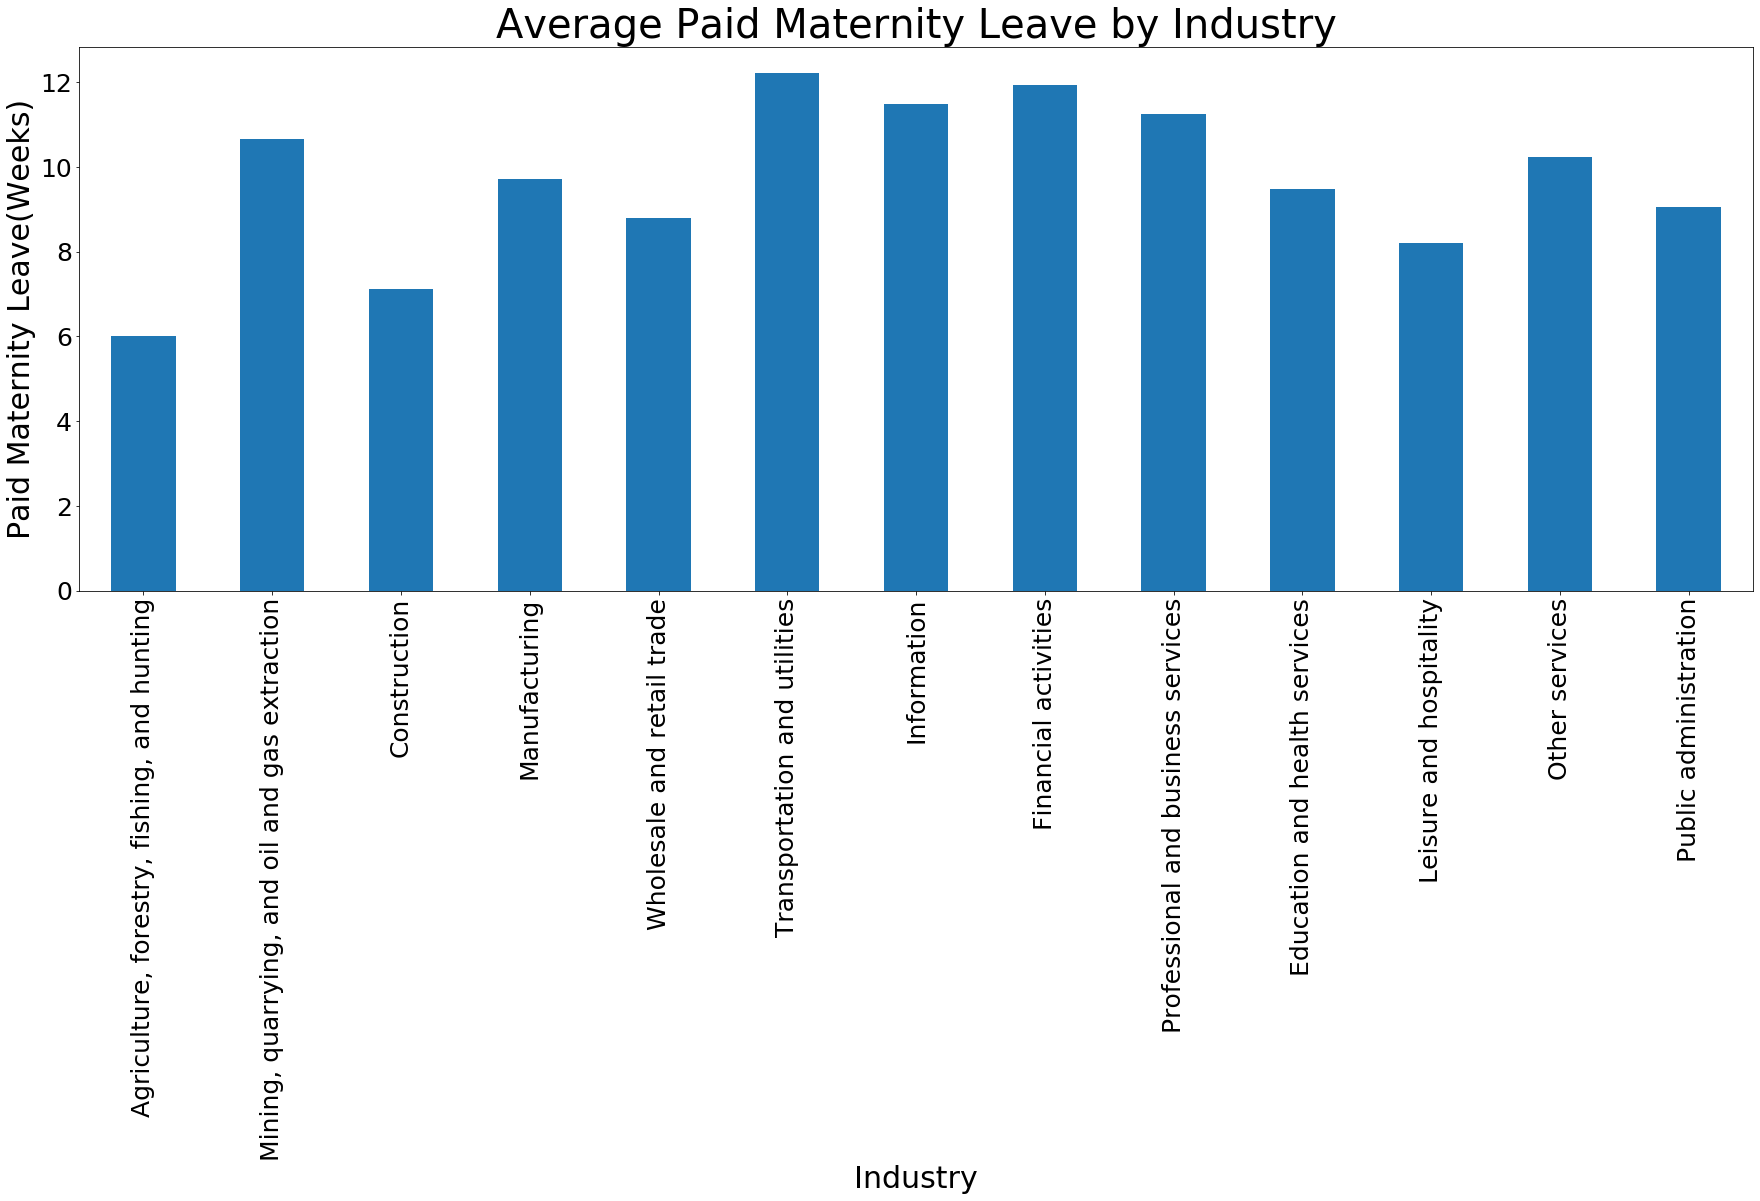

In [100]:
g1 = df_industry_leave.plot.bar('Industry', 'Average Paid Maternity Leave', figsize=(30, 10), legend=False)
g1.set_title("Average Paid Maternity Leave by Industry", fontsize=40)
g1.set_xlabel("Industry", fontsize=30)
g1.set_ylabel("Paid Maternity Leave(Weeks)", fontsize=30)
g1.tick_params(labelsize=25)
f1 = plt.gcf()

The graph shows that the average number of weeks of paid maternity leave in industries like information, Transportation, Fincance, and business services higher than in industries like agriculture and construction. 

Next we will analyze whether or not the amount of female participation in an industry is related to the average number of weeks of paid maternity leave. 

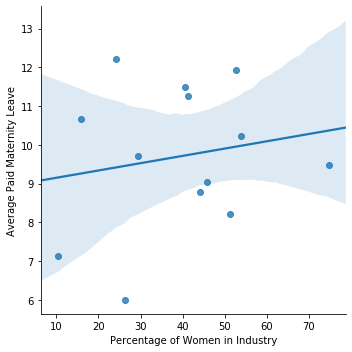

In [101]:
g2 = sns.lmplot(x='Women',y='Average Paid Maternity Leave',data=df_industry_leave,fit_reg=True)
g2 = (g2.set_axis_labels("Percentage of Women in Industry", "Average Paid Maternity Leave"))

Looking at the diagram above, there does not seem to be a significant relationship between the amount of female participation in an industry, and the average number of paid weeks of maternity leave. To be thorough, we will still do a regression. 

In [102]:
x = df_industry_leave["Average Paid Maternity Leave"]
y = df_industry_leave["Women"]
outcome, predictors = patsy.dmatrices('x ~ y', df_industry_leave)
mod_1 = sm.OLS(outcome,predictors)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.3598
Date:                Fri, 12 Jun 2020   Prob (F-statistic):              0.561
Time:                        15:26:58   Log-Likelihood:                -25.854
No. Observations:                  13   AIC:                             55.71
Df Residuals:                      11   BIC:                             56.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9623      1.341      6.684      0.0

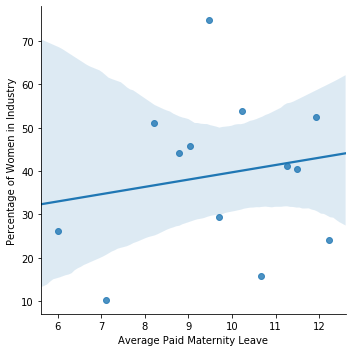

In [103]:
g3 = sns.lmplot(x='Average Paid Maternity Leave',y='Women',data=df_industry_leave,fit_reg=True)
g3 = (g3.set_axis_labels("Average Paid Maternity Leave", "Percentage of Women in Industry"))

In [104]:
x = df_industry_leave["Average Paid Maternity Leave"]
y = df_industry_leave["Women"]
outcome, predictors = patsy.dmatrices('y ~ x', df_industry_leave)
mod_2 = sm.OLS(outcome,predictors)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.3598
Date:                Fri, 12 Jun 2020   Prob (F-statistic):              0.561
Time:                        15:27:00   Log-Likelihood:                -55.067
No. Observations:                  13   AIC:                             114.1
Df Residuals:                      11   BIC:                             115.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8969     27.692      0.827      0.4

Our p value is still extremely high, which means that we fail to reject the null hypothesis.

We have answered our first question as to whether or not there is a quantifiable linaer relationship between the percentage of women in an industry and the average number of weeks of paid maternity leave in that industry. Further analysis of this result is given in our conclusion. 
From here, we would like to examine the technology industry more closely. In our bar graph, it can be shown that the Information industry, which include technology and software companies, the average number of paid weeks of maternity leave provided is higher relative to many of the other industries plotted. We would like to examine the relationship between female labor participation and maternity leave in this industry more closely.

In [107]:
df_gender_manager = pd.read_csv('Reveal_EEO1_for_2016.csv')
df_gender_manager = df_gender_manager[df_gender_manager['race'] != 'Overall_totals']
df_gender_manager = df_gender_manager[df_gender_manager['count'] != 'na']
df_gender_manager = df_gender_manager.astype({"count": int})
df_gender_manager


,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0
...,...,...,...,...,...,...
4483,Sanmina,2016,White,male,laborers and helpers,2
4484,Sanmina,2016,White,male,Service workers,32
4485,Sanmina,2016,White,male,Totals,1821
4486,Sanmina,2016,White,male,Previous_totals,1854


In [134]:
print(df_mat_lv['Company Name'].unique())

['ClassPass' 'Equinox' 'Enterprise Holdings' 'Hertz Global Holdings, Inc.'
 'Avis Budget Group, Inc.' 'SalonCentric' 'Worldwide Produce'
 'Larson-Juhl' 'Amtrak' 'Union Pacific Railroad' 'United Airlines'
 'Southwest Airlines Co.' 'American Airlines' 'Delta Air Lines, Inc.'
 'HAVI Global Solutions' 'Dematic' 'Schneider National'
 'C.A.R. Transport Inc.' 'FedEx' 'Central Ohio Transit Authority' 'BART'
 'Viasat' 'Asurion' 'Sprint Corporation'
 'Crown Castle International Corporation' 'Qualcomm Incorporated'
 'RingCentral, Inc.' 'AT&T' 'T-Mobile' 'Verizon' 'Comcast' 'Zoom'
 'Spectrum' 'Nokia' 'Bitdefender' 'Rangle.io' 'JHC Systems' 'Zendesk, Inc'
 'Palantir' 'Salesforce' 'PandaDoc' 'Bounce Exchange' 'SAP' 'ServiceNow'
 'VMware' 'Slack Technologies' 'Citrix' 'MicroStrategy' 'Adobe Systems'
 'Ceridian' 'Cornerstone OnDemand, Inc.' 'Informatica' 'Symphony Talent'
 'Addepar' 'Palo Alto Networks' 'Tanium' 'Forcepoint' 'Allegion PLC'
 'Coalfire' 'Alarm.com' 'Raytheon' 'Magic Leap' 'Waters Corpor

In [135]:
data = {'company': [], 'executives_or_managers_count': [], 'maternity_leave_paid': [], 'maternity_leave_unpaid': [], 'total_pop': [], 'e_or_m_ratio':[]}

# The following loops will append a companys total number of female executives/managers as 
# compared to their paid/unpaid maternity leave
for company in df_gender_manager['company'].unique():
    rows = df_gender_manager[df_gender_manager['company'] == company]
    total_pop = rows['count'].sum()
    data['total_pop'].append(total_pop)
    rows = rows[(rows['job_category'] == 'Executives') | (rows['job_category'] == 'Managers')]
    rows = rows[rows['gender'] == 'female']
    rows['count'] = rows['count'].astype(int)
    data['company'].append(company)
    executives_or_managers_count = rows['count'].sum()
    data['executives_or_managers_count'].append(executives_or_managers_count)
    data['maternity_leave_paid'].append(0)
    data['maternity_leave_unpaid'].append(0)
    data['e_or_m_ratio'].append(executives_or_managers_count/total_pop)

for company in df_gender_manager['company'].unique():
    #print(company)
    if company in df_mat_lv['Company Name'].unique():
        index = data['company'].index(company)
        data['maternity_leave_paid'][index] = int(df_mat_lv[df_mat_lv['Company Name']==company]["Maternity Leave (paid)"].values)
        try:
            data['maternity_leave_unpaid'][index] = int(df_mat_lv[df_mat_lv['Company Name']==company]["Maternity Leave (unpaid)"].values)
        except:
            data['maternity_leave_unpaid'][index] = 0
        

23andMe
Adobe
Airbnb
Apple
Cisco
eBay
Facebook
Google
HP Inc.
HPE
Intel
Intuit
LinkedIn
Lyft
MobileIron
Nvidia
Pinterest
Salesforce
Square
Twitter
Uber
View
PayPal
NetApp
Sanmina


In [139]:
df_num_managers = pd.DataFrame(data)
df_num_managers = df_num_managers.sort_values(by='company', ascending=True)
#df_num_managers.reset_index()
df_num_managers

,company,executives_or_managers_count,maternity_leave_paid,maternity_leave_unpaid,total_pop,e_or_m_ratio
0,23andMe,37,0,0,594,0.062290
1,Adobe,868,0,0,20905,0.041521
2,Airbnb,159,0,0,5235,0.030372
3,Apple,2270,15,10,226878,0.010005
4,Cisco,1342,13,3,111366,0.012050
6,Facebook,638,19,0,30928,0.020629
7,Google,3969,14,7,132191,0.030025
8,HP Inc.,612,9,12,99377,0.006158
9,HPE,1860,0,0,103978,0.017888
10,Intel,1548,0,0,162003,0.009555


In [140]:
df_num_managers = df_num_managers.drop([0,13,23,15,22,16,21,18,19,5])
df_num_managers

,company,executives_or_managers_count,maternity_leave_paid,maternity_leave_unpaid,total_pop,e_or_m_ratio
1,Adobe,868,0,0,20905,0.041521
2,Airbnb,159,0,0,5235,0.030372
3,Apple,2270,15,10,226878,0.010005
4,Cisco,1342,13,3,111366,0.012050
6,Facebook,638,19,0,30928,0.020629
7,Google,3969,14,7,132191,0.030025
8,HP Inc.,612,9,12,99377,0.006158
9,HPE,1860,0,0,103978,0.017888
10,Intel,1548,0,0,162003,0.009555
11,Intuit,420,0,0,18186,0.023095


In [142]:
# manually adding in some of the data from the dataset, by filling in from the original CSV
df_num_managers.at[1,'maternity_leave_paid'] = 17
df_num_managers.at[1,'maternity_leave_unpaid'] = 15
df_num_managers.at[2,'maternity_leave_paid'] = 30
df_num_managers.at[2,'maternity_leave_unpaid'] = 8
df_num_managers.at[9,'maternity_leave_paid'] = 19
df_num_managers.at[9,'maternity_leave_unpaid'] = 29
df_num_managers.at[10,'maternity_leave_paid'] = 8
df_num_managers.at[10,'maternity_leave_unpaid'] = 12
df_num_managers.at[11,'maternity_leave_paid'] = 12
df_num_managers.at[11,'maternity_leave_unpaid'] = 7
df_num_managers.at[12,'maternity_leave_paid'] = 16
df_num_managers.at[12,'maternity_leave_unpaid'] = 4
df_num_managers

,company,executives_or_managers_count,maternity_leave_paid,maternity_leave_unpaid,total_pop,e_or_m_ratio
1,Adobe,868,17,15,20905,0.041521
2,Airbnb,159,30,8,5235,0.030372
3,Apple,2270,15,10,226878,0.010005
4,Cisco,1342,13,3,111366,0.012050
6,Facebook,638,19,0,30928,0.020629
7,Google,3969,14,7,132191,0.030025
8,HP Inc.,612,9,12,99377,0.006158
9,HPE,1860,19,29,103978,0.017888
10,Intel,1548,8,12,162003,0.009555
11,Intuit,420,12,7,18186,0.023095


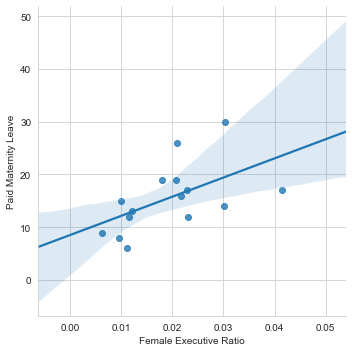

In [144]:
g4 = sns.lmplot(x='e_or_m_ratio',y='maternity_leave_paid',data=df_num_managers,fit_reg=True)
g4 = (g4.set_axis_labels("Female Executive Ratio", "Paid Maternity Leave"))

In [146]:
outcome_4, predictors_4 = patsy.dmatrices('maternity_leave_paid ~ e_or_m_ratio', df_num_managers)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())

                             OLS Regression Results                             
Dep. Variable:     maternity_leave_paid   R-squared:                       0.301
Model:                              OLS   Adj. R-squared:                  0.247
Method:                   Least Squares   F-statistic:                     5.585
Date:                  Fri, 12 Jun 2020   Prob (F-statistic):             0.0344
Time:                          20:38:46   Log-Likelihood:                -45.908
No. Observations:                    15   AIC:                             95.82
Df Residuals:                        13   BIC:                             97.23
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.5323     

/Users/gaurikad/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In order to expolore this dataset further, we will do a similar regression measuring the total amount of maternity leave, paid and unpaid against the ratio of female executives.

In [148]:
df_num_managers['total_leave'] = df_num_managers['maternity_leave_paid'] + df_num_managers['maternity_leave_unpaid']
df_num_managers

,company,executives_or_managers_count,maternity_leave_paid,maternity_leave_unpaid,total_pop,e_or_m_ratio,total_maternity_leave,total_leave
1,Adobe,868,17,15,20905,0.041521,32,32
2,Airbnb,159,30,8,5235,0.030372,38,38
3,Apple,2270,15,10,226878,0.010005,25,25
4,Cisco,1342,13,3,111366,0.012050,16,16
6,Facebook,638,19,0,30928,0.020629,19,19
7,Google,3969,14,7,132191,0.030025,21,21
8,HP Inc.,612,9,12,99377,0.006158,21,21
9,HPE,1860,19,29,103978,0.017888,48,48
10,Intel,1548,8,12,162003,0.009555,20,20
11,Intuit,420,12,7,18186,0.023095,19,19


In [150]:
r_total = df_num_managers['total_leave'].max() - df_num_managers['total_leave'].min()
print("The range for the total weeks of leave provided is: " + str(r_total) + " weeks.")
r_paid = df_num_managers['maternity_leave_paid'].max() - df_num_managers['maternity_leave_paid'].min()
print("The range for the number of paid weeks of leave provided is: " + str(r_paid) + " weeks.")


The range for the total weeks of leave provided is: 36 weeks.
The range for the number of paid weeks of leave provided is: 24 weeks.


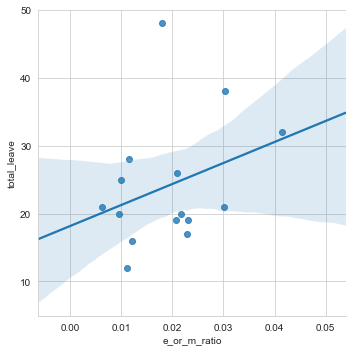

In [151]:
g5 = sns.lmplot(x='e_or_m_ratio',y='total_leave',data=df_num_managers,fit_reg=True)
g4 = (g4.set_axis_labels("Female Executive Ratio", "Total Leave provided (paid and unpaid)"))

In [152]:
outcome_5, predictors_5 = patsy.dmatrices('total_leave ~ e_or_m_ratio', df_num_managers)
mod_5 = sm.OLS(outcome_5, predictors_5)
res_5 = mod_5.fit()
print(res_5.summary())

                            OLS Regression Results                            
Dep. Variable:            total_leave   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.490
Date:                Fri, 12 Jun 2020   Prob (F-statistic):              0.244
Time:                        20:55:14   Log-Likelihood:                -53.421
No. Observations:                  15   AIC:                             110.8
Df Residuals:                      13   BIC:                             112.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       18.1669      5.430      3.346   

In [114]:
df_management = pd.read_csv("managerialpostions.csv")
df_management.head()
df_management_us = df_management[df_management.Country == "United States of America"]

In [115]:
df_senior = pd.read_csv("senior_management_positions.csv")
df_senior_us = df_senior[df_senior.Country == "United States of America"]

In [116]:
df_management_us = df_management_us.drop(columns =["Age", "Location", "Occupation", "LowerBound", "UpperBound", "OriginData", "Footnote1", "Footnote2"]) 
df_management_us.head()


,Indicator Name,Region,Country Code,Country,Year,Sex,Value,Unit,NatureData
792,Proportion of women in managerial positions,Developed regions,840,United States of America,2003,Female,37.5,Percentage,Country data
793,Proportion of women in managerial positions,Developed regions,840,United States of America,2008,Female,38.3,Percentage,Country data
794,Proportion of women in managerial positions,Developed regions,840,United States of America,2000,Female,36.0,Percentage,Country data
795,Proportion of women in managerial positions,Developed regions,840,United States of America,2005,Female,37.8,Percentage,Country data
796,Proportion of women in managerial positions,Developed regions,840,United States of America,2007,Female,38.4,Percentage,Country data


In [117]:
df_senior_us = df_senior_us.drop(columns = ["Age", "Location", "Occupation", "LowerBound", "UpperBound", "OriginData", "Footnote1", "Footnote2", "Footnote3", "Footnote4", "Footnote5", "Footnote6", "Coverage"]) 
df_senior_us.head()

,Indicator Name,Region,Country Code,Country,Year,Sex,Value,Unit,NatureData
588,Proportion of women in senior and middle manag...,Developed regions,840,United States of America,2003,Female,37.3,Percentage,Country data
589,Proportion of women in senior and middle manag...,Developed regions,840,United States of America,2008,Female,37.9,Percentage,Country data
590,Proportion of women in senior and middle manag...,Developed regions,840,United States of America,2000,Female,35.5,Percentage,Country data
591,Proportion of women in senior and middle manag...,Developed regions,840,United States of America,2005,Female,37.5,Percentage,Country data
592,Proportion of women in senior and middle manag...,Developed regions,840,United States of America,2007,Female,38.1,Percentage,Country data


In [118]:
df_manage = pd.concat([df_management_us, df_senior_us], ignore_index=True)
df_manage = df_manage.replace({'Indicator Name': "Proportion of women in senior and middle management positions"}, "Proportion of women in managerial positions")
df_manage = df_manage.sort_values('Year')
df_manage = df_manage.reset_index(drop=True)
df_manage.head()

,Indicator Name,Region,Country Code,Country,Year,Sex,Value,Unit,NatureData
0,Proportion of women in managerial positions,Developed regions,840,United States of America,2000,Female,36.0,Percentage,Country data
1,Proportion of women in managerial positions,Developed regions,840,United States of America,2000,Female,35.5,Percentage,Country data
2,Proportion of women in managerial positions,Developed regions,840,United States of America,2001,Female,35.9,Percentage,Country data
3,Proportion of women in managerial positions,Developed regions,840,United States of America,2001,Female,36.4,Percentage,Country data
4,Proportion of women in managerial positions,Developed regions,840,United States of America,2002,Female,36.4,Percentage,Country data


In [119]:
df_manage.describe()

,Country Code,Year,Value
count,36.0,36.000000,36.000000
mean,840.0,2008.500000,38.147222
std,0.0,5.261722,1.262534
min,840.0,2000.000000,35.500000
25%,840.0,2004.000000,37.300000
50%,840.0,2008.500000,38.300000
75%,840.0,2013.000000,39.025000
max,840.0,2017.000000,40.500000


Text(0.5, 1.0, 'Proportion of Women in Management Positions from 2000 to 2017')

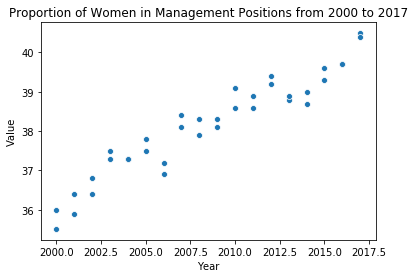

In [120]:
ax = sns.scatterplot(x="Year", y="Value", data=df_manage)
ax.set_title("Proportion of Women in Management Positions from 2000 to 2017")


From this inital scatterplot created by plotting the proportion of women in management positions versus the year of the observation, we can already tell that there is a strong positive relationship between these two variables.

However, to be sure of this, we can go on to perform a linear regression analysis to find out the strength of this relationship.

The type of linear regression that we will be performing is an Ordinary Least Squares analysis, which means that we are fitting a regression line that would minimize the square of distance from the regression line.

In [121]:
# X, or the year, is the independent variable, and Y, or the value/proportion of women, is the dependent value.
X = df_manage["Year"]
y = df_manage["Value"]

# this carries out the Ordinary Least Squares analysis
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
p = model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.844e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):                    8.08e-55
Time:                        18:29:43   Log-Likelihood:                         -56.149
No. Observations:                  36   AIC:                                      114.3
Df Residuals:                      35   BIC:                                      115.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0190   9.69e-05    196.066      0.000       0.019       0.019
==============================================================================
Omnibus:                        0.829   Durbin-Watson:                   0.145
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.879
Skew:                          -0.241   Prob(JB):                        0.644
Kurtosis:                       2.406   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This table shows the coefficient of this regression to be 0.0190. This means that as the Year variable increases by 1, there will be a 0.0190 increase in the proportion of women in management positions. We can interpret this to mean that the proportion of women in management positions increases by around 1.9% each year. This trend has held steady from the year 2000.

Based on this output, we can see that the R-squared value is 0.999, meaning that this model explains 99.9% of the variance in the proportion of women in management positions.

In [122]:
df = pd.DataFrame(df_manage, columns=['Year', 'Value'])

#Check correlation between Year and Value
df.corr()


,Year,Value
Year,1.000000,0.955019
Value,0.955019,1.000000


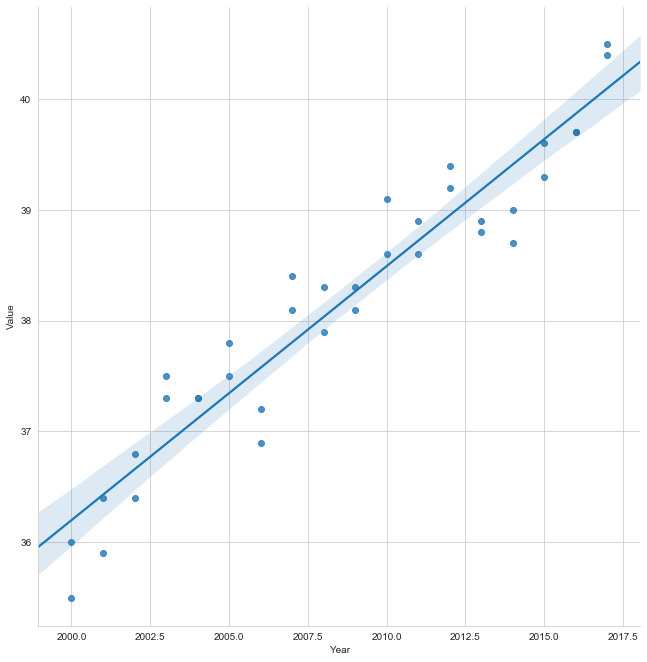

In [123]:
sns.set_style('whitegrid') 
g = sns.lmplot(x='Year', y='Value', data=df_manage)
g.fig.set_size_inches(10,10)


In [124]:
type(predictions)

pandas.core.series.Series

In [125]:
print(predictions.to_string())

0     37.988587
1     37.988587
2     38.007581
3     38.007581
4     38.026576
5     38.026576
6     38.045570
7     38.045570
8     38.064564
9     38.064564
10    38.083559
11    38.083559
12    38.102553
13    38.102553
14    38.121547
15    38.121547
16    38.140542
17    38.140542
18    38.159536
19    38.159536
20    38.178530
21    38.178530
22    38.197524
23    38.197524
24    38.216519
25    38.216519
26    38.235513
27    38.235513
28    38.254507
29    38.254507
30    38.273502
31    38.273502
32    38.292496
33    38.292496
34    38.311490
35    38.311490


This list of predictions shows the predicted proportion of women in management in the coming years. This is based on the model that we fitted using the Ordinary Least Squares analysis, and shows the results for up to the next 35 years.

For example, one way to interpret these predictions would be to say that in 5 years from 2017, or in 2022, the predicted percentage of women in senior and middle management positions would be around 38.03%. This shows the gradual increase in the proportion of women with the passing of time.

However, there are some confounding factors that might have contributed to a skewed analaysis of these two variables. This could have been bias in the women that were observed, they might have all been chosen from the same industry, which could have been one that had a higher or lower than average proportion of women in management. Also, the definition of "management positions" could have too specific to generalize over an entire workforce of women, or maybe too general.

With these preliminary results, I conclude that there has been a steady increase in the proportion of women in the workforce over the last 20 or so years, but there is still a long way to go before women make up 50% of people in management positions.